# Project Milestone 1 

1) 250-500-word narrative describing your original 
   idea for the analysis/model building business problem. Clearly identify the problem you will address and the target for your model.

As part of project, I have choosen to analyse and build a model using the Vehicle data.

In the automotive sector, pricing analytics play an essential role for both companies and individuals to assess the market price of a vehicle before putting it on sale or buying it.

there are millions of cars being sold in the market every year, efective price strtegies can help organizations to seel the cars for a competitive price and make profits.

There are two main goals I want to achieve with this Data Science Project. 

First, to estimate the price of used cars by taking into account a set of features like price, odometer and year of the vehicle based on historical data. 

Second, to get a better understanding on the most relevant features that help determine the price of a used vehicle it means, which features are the most relevant ones when estimating the dependent variable “price”.

The data that will be used for this project is accessible at Kaggle and has been scraped from Craigslist, the world’s largest collection of used vehicles for sale.

The Database consists of 426,880 rows and 26 features, one of which will be the continuous dependent variable (“price”) that we want to predict.

The numerical features play a big role in this Regression model, so it is important to understand well how are they distributed in the Database.

As part of this project we will first perfom the EDA, it means, will have to find the outliners and NaaN values/ missing values from the dataset, so that we can better train our model.

Also we need to check for any duplicates,if so, we will have to delete them and keep only one row for each unique record.


2) Do a graphical analysis creating a minimum of four graphs. Label your graphs appropriately and explain/analyze the information provided by each graph. Your analysis should begin to answer the question(s) you are addressing. Write a short overview/conclusion of the insights gained from your graphical analysis.

In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
sns.set(); 

In [2]:
# Read movie data tsv file 
vehicle_data=pd.read_csv('vehicles.csv')

In [3]:
vehicle_data.shape

(426880, 26)

In [4]:
vehicle_data.head(5)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


# correlation between the features.

<AxesSubplot:>

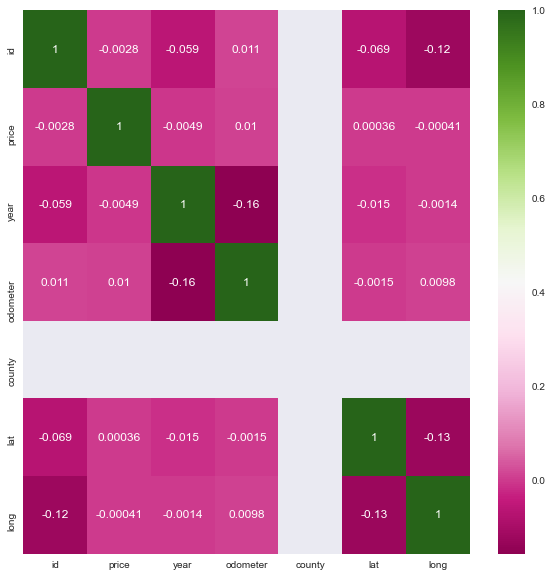

In [5]:

#Heatmaps are the maps that are one of the best ways to find the correlation between the features.
#When the heatmaps is plotted we can see a strong dependency between the Price and odometer.
plt.figure(figsize=(10,10))
plt.style.use("seaborn")
c= vehicle_data.corr()
sns.heatmap(c,cmap='PiYG',annot=True)

# Outliers in Price and odometer

C:\Users\nbaga\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nbaga\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='odometer', ylabel='Density'>

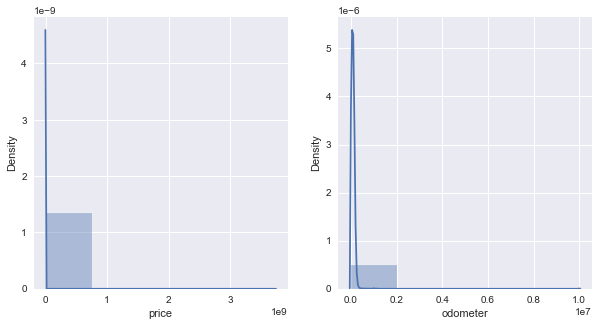

In [7]:
plt.figure(figsize=[10,5])
plt.subplot(121)
sns.distplot(vehicle_data['price'],bins=5)
plt.subplot(122)
sns.distplot(vehicle_data['odometer'],bins=5)

# Scatter Plot for price outliers

In [8]:
# First will drop 10% of each side on Price

rr=sorted(vehicle_data['price'])
quantile1,quantile2=np.percentile(rr,[10,90])
print(quantile1,quantile2)

500.0 37590.0


In [9]:
vehicle_data=vehicle_data[(vehicle_data.price<=37590) & (vehicle_data.price>=500)]

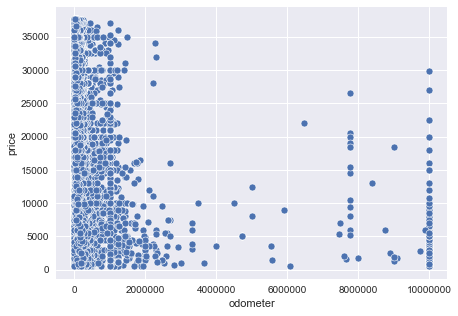

In [10]:
plt.figure(figsize=[7,5])
ax=sns.scatterplot(x=vehicle_data['odometer'],y=vehicle_data['price'])
ax.get_xaxis().get_major_formatter().set_scientific(False)
ax.get_yaxis().get_major_formatter().set_scientific(False)

In [17]:
number_of_vehicles=vehicle_data.groupby(by=["year"], dropna=True).count()

In [36]:
number_of_vehicles

,id,url,region,region_url,price,manufacturer,model,condition,cylinders,fuel,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
year,,,,,,,,,,,,,,,,,,,,,
1900.0,3,3,3,3,3,1,3,2,0,3,...,0,2,1,3,3,0,3,3,3,3
1901.0,2,2,2,2,2,0,2,1,1,2,...,1,1,1,2,2,0,2,2,2,2
1905.0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0,1,1,1,1
1909.0,1,1,1,1,1,0,1,1,1,1,...,1,1,1,1,1,0,1,1,1,1
1910.0,2,2,2,2,2,0,2,2,2,2,...,0,2,2,2,2,0,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018.0,24569,24569,24569,24569,24569,24252,24534,16218,11236,24392,...,4300,21698,18052,24569,24569,0,24569,24415,24415,24569
2019.0,14884,14884,14884,14884,14884,14672,14870,9924,6830,14757,...,2308,13021,11168,14884,14884,0,14884,14785,14785,14884
2020.0,9583,9583,9583,9583,9583,9389,9571,7412,2968,9501,...,767,8566,7368,9583,9583,0,9583,9573,9573,9583


# Number of vehicles by Year for Sale

<AxesSubplot:xlabel='year'>

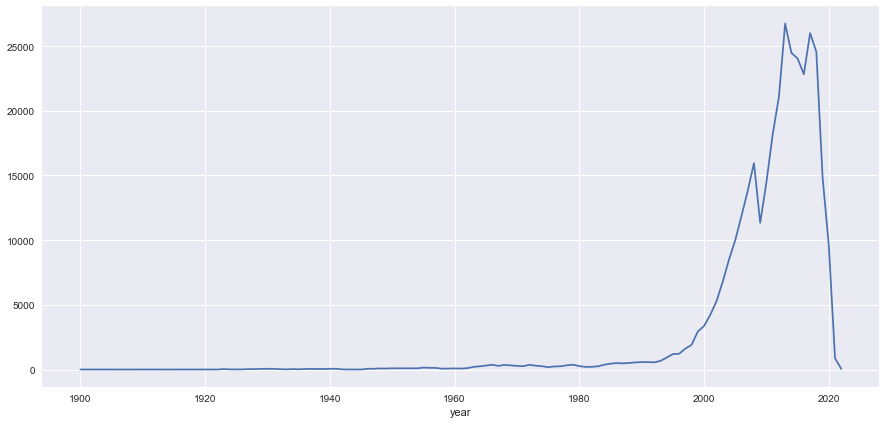

In [38]:
fig, ax = plt.subplots(figsize=(15,7))
vehicle_data.groupby(['year']).count()['id'].plot(ax=ax)

# Conclusion

Based on the Above data and graphs, I understand that there are lot of outliners in the price features,also have NaaN,null and missing values in other features, in order to train the model,
but most of the features have hightest missing values, we should first clean up the data and filter the data to get the insights. 
Description column has the useful information for our model, we should write regular expression on description column to filter the useful info like car make etc.

I am planning to use Random Forest Regression model to get the “price” predictions.